In [13]:
import numpy as np

import matplotlib.pyplot as plt

from aeon.utils.numba.general import z_normalise_series
from aeon.transformations.collection import Normalizer

In [9]:
%load_ext autoreload
%autoreload 2

from ksfdtw.utils import nearest_neighbor_interpolation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example Data

In [ ]:
# a = [0, 0, 1, 2, 1, 0, 1, 0, 0]
# b = [0, 1, 2, 0, 0, 0, 0, 0, 1]

In [20]:
np.random.seed(42)
a = np.random.random(20)
b = np.random.random(20)

# Normalization

In [25]:
a_norm = z_normalise_series(a)
b_norm = z_normalise_series(b)
print(a_norm.mean(), a_norm.std())  # ~0, ~1

-1.9984014443252818e-16 1.0


In [26]:
# https://www.aeon-toolkit.org/en/v1.1.0/api_reference/auto_generated/aeon.transformations.collection.Normalizer.html
normaliser = Normalizer()

In [33]:
X = np.array(a.reshape(1, -1))
X

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
        0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
        0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914]])

In [34]:
X = np.array([a])
X

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
        0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
        0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914]])

In [35]:
X_norm = normaliser.fit_transform(X)
X_norm

array([[[-0.27730331,  1.64394295,  0.91462239,  0.47001683,
         -1.00596069, -1.00604111, -1.33252392,  1.36205142,
          0.47820809,  0.83485688, -1.4575643 ,  1.70795028,
          1.24956743, -0.81816072, -0.91990978, -0.91464282,
         -0.51171077,  0.22359128, -0.08588732, -0.55510282]]])

In [37]:
mean = np.mean(X_norm, axis=-1)
std = np.std(X_norm, axis=-1)
print("Mean:", mean)
print("Std:", std)
assert np.allclose(mean, 0)
assert np.allclose(std, 1)

Mean: [[1.60982339e-16]]
Std: [[1.]]


# Plot Example

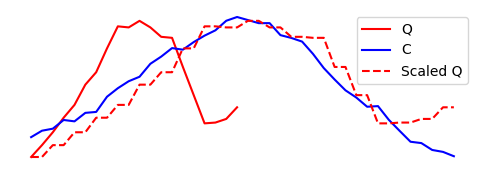

In [14]:
np.random.seed(0)
q = np.cumsum(np.random.rand(20) * 2 - 1 + np.sin(np.linspace(0, 2 * np.pi, 20)))
c = np.cumsum(np.random.rand(40) * 2 - 1 + np.sin(np.linspace(0, 2 * np.pi, 40)))
# c_x2 = np.linspace(0, 1, 10)
# c_y2 = np.piecewise(c_x2, [c_x2 < 0.5, c_x2 >= 0.5], [lambda x: 2*x, lambda x: 2*(1-x)])
# c_y2 = c_y2 *5
# offset = c[-1] - c_y2[0]
# c_y2 = c_y2 + offset
# c = np.concatenate([c, c_y2])
q_scaled = nearest_neighbor_interpolation(q, len(c))

# q = normalize(q)
# c = normalize(c)
# q_scaled = normalize(q_scaled)
q = z_normalise_series(q)
c = z_normalise_series(c)
q_scaled = z_normalise_series(q_scaled)

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(6, 2))

ax1.plot(q, label="Q", color="red")
ax1.plot(c, label="C", color="blue")
ax1.plot(q_scaled, label="Scaled Q", linestyle="--", color="red")

# ax1.set_title('Example of US')
ax1.legend()

# https://stackoverflow.com/questions/9295026/how-to-remove-axis-legends-and-white-padding
plt.axis("off")
# https://www.tutorialspoint.com/save-the-plots-into-a-pdf-in-matplotlib
# plt.savefig("../figures/us.pdf", format="pdf", bbox_inches="tight")
plt.show()